In [1]:
from fixedpoint import FixedPoint
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
from mandelbrot_functions import mandelbrot_iter, mandelbrot_loop, real_values, imag_values, m, n, MAX_ITER, R
def FP(x):
    return FixedPoint(x, m=m, n=n, signed=True, str_base=2)

In [9]:
ratio = 1

real = real_values[::ratio]
imag = imag_values[::ratio]

ENABLE_FIXED = False
ENABLE_FLOAT = True


array_float = np.zeros([len(imag), len(real)], dtype=float)
array_fixed = np.zeros([len(imag), len(real)], dtype=FixedPoint)

for xi in trange(len(real), desc='X'):
    x = real[xi]
    for yi, y in enumerate(imag):
        if ENABLE_FLOAT:
            array_float[yi,xi] = mandelbrot_loop(x, y, R, m=m, n=n, max_iter=MAX_ITER)
        if ENABLE_FIXED:
            array_fixed[yi,xi] = mandelbrot_loop(FP(x), FP(y), FP(R), m=m, n=n, max_iter=MAX_ITER)

X:   0%|          | 0/1280 [00:00<?, ?it/s]

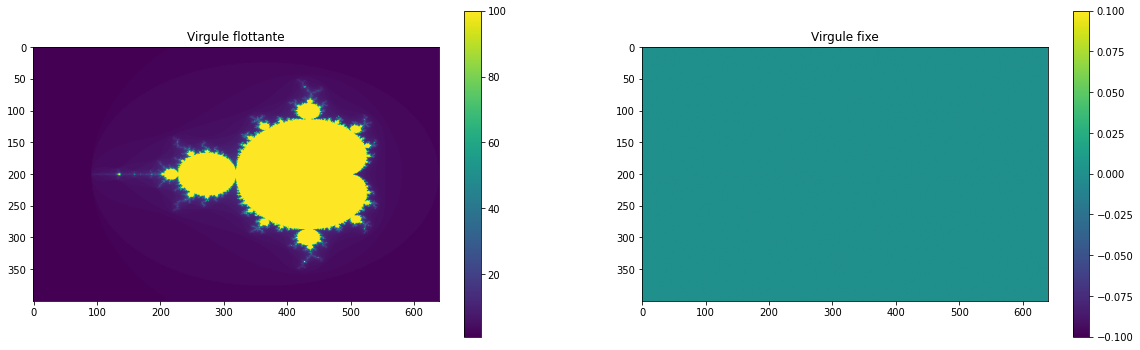

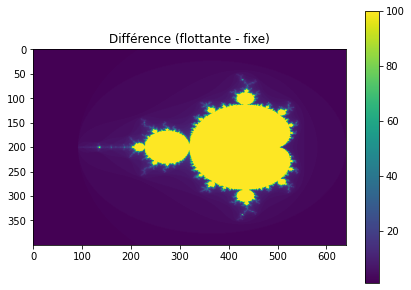

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('Virgule flottante')
plt.imshow(array_float)
plt.colorbar()
plt.subplot(122)
plt.title('Virgule fixe')
plt.imshow(array_fixed.astype(float))
plt.colorbar()
plt.show()

plt.figure(figsize=(7,5))
plt.imshow(array_float - array_fixed.astype(float))
plt.colorbar()
plt.title('Différence (flottante - fixe)')
plt.show()

In [8]:
# Stockage dans un fichier
np.save("mandelbrot_iterations", array_float)